In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [224]:
# Read SOC excel files

soc2018=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/soc_structure_2018.xlsx", header=7)
soc2018_changes = pd.read_excel("//Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/soc_2018_type_of_change_by_detail_occup.xlsx", header=8)
soc2010=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/soc_structure_2010.xls", header=11)
soc2018_dm=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/soc_2018_direct_match_title_file.xlsx",header=7)

In [225]:
# Labelling columns and cleaning up


soc2018 = soc2018.rename(columns = {'Unnamed: 4':'Occupation'})
soc2018_dm=soc2018_dm.drop(columns={'Illustrative Example'})

In [226]:
soc2018['Occupation']=soc2018['Occupation'].str.lower()

In [227]:
# Reading in all the datasets from 2011-2021

df2021=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2021.xlsx",header=5)
df2020=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2020.xlsx",header=5)
df2019=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2019.xlsx",header=5)
df2018=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2018.xlsx",header=5)
df2017=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2017.xlsx",header=5)
df2016=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2016.xlsx",header=5)
df2015=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2015.xlsx",header=5)
df2014=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2014.xlsx",header=5)
df2013=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2013.xlsx",header=5)
df2012=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2012.xlsx",header=5)
df2011=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2011.xlsx",header=5)

In [228]:
# Add in the years and rename the columns

df2021['Unnamed: 10'] = 2021
df2020['Unnamed: 10'] = 2020
df2019['Unnamed: 10'] = 2019
df2018['Unnamed: 10'] = 2018
df2017['Unnamed: 10'] = 2017
df2016['Unnamed: 10'] = 2016
df2015['Unnamed: 10'] = 2015
df2014['Unnamed: 10'] = 2014
df2013['Unnamed: 10'] = 2013
df2012['Unnamed: 10'] = 2012
df2011['Unnamed: 10'] = 2011


df=pd.concat([df2021,df2020,df2019,df2018,df2017,df2016,df2015,df2014,df2013,df2012,df2011])

df = df.rename(columns={'Unnamed: 0':'Occupation','Unnamed: 1':'Total','Unnamed: 2':'16-19','Unnamed: 3':'20-24','Unnamed: 4':'25-34','Unnamed: 5':'35-44','Unnamed: 6':'45-54','Unnamed: 7':'55-64','Unnamed: 8':'65<=','Unnamed: 9':'Median age','Unnamed: 10':'Year'})


In [229]:
# Drop redundant rows, eg. blank rows
df.reset_index(drop=True, inplace=True)     # Reset index to ensure the correct rows are dropped
df=df.drop(index=df.groupby('Year').head(2).index)
df=df.drop(index=df.groupby('Year').tail(2).index)
df=df[df['Occupation'].notnull()]
df.reset_index(drop=True, inplace=True)

In [230]:
# Standardize all occupations to lowercase and remove double spaces

df['Occupation'] = df['Occupation'].str.lower()
df['Occupation']=df['Occupation'].str.replace(r'\s+', ' ', regex=True)

# Replace en dashes with hyphens

df['Median age']=df['Median age'].replace('–','-')


In [231]:
soc2018['Occupation']=soc2018['Occupation'].str.lower()

In [232]:
soc2018.loc[soc2018['Major Group'].notnull(),['Minor Group','Broad Group','Detailed Occupation']]='-'

In [233]:
soc2018['Major Group'].ffill(axis=0, inplace=True)

In [234]:
soc2018.loc[soc2018['Minor Group'].notnull(),['Broad Group','Detailed Occupation']]='-'

In [235]:
soc2018['Minor Group'].ffill(axis=0, inplace=True)

In [236]:
soc2018.loc[soc2018['Broad Group'].notnull(),['Detailed Occupation']]='-'

In [237]:
soc2018['Broad Group'].ffill(axis=0, inplace=True)

2011-2019 have the same number of occupations (and presumably the same list of occupations): 572. Meanwhile 2020-2021 have 602 rows.

In [102]:
# joint_deleted = pd.merge(left = df[df['Year']!=2021|2020], 
#          right = deleted_soc,
#         how= 'inner',
#         left_on='Occupation',
#         right_on='2010 SOC Title',
#         indicator=True)

In [107]:
# joint_deleted

In [23]:
joint = pd.merge(left = df[df['Year']==2021], 
         right = df[df['Year']==2018],
        how= 'outer',
        left_on='Occupation',
        right_on='Occupation',
        indicator=True)

Import Changes.xlsx

In [238]:
changes2010=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data cleaning/Changes.xlsx",sheet_name=0)
changes2018=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data cleaning/Changes.xlsx",sheet_name=1)


In [239]:
# Remove unwanted columns

changes2010.drop(changes2010.columns[[0,2,3,4,5,6,7,8,9,10,11,14]],axis=1,inplace=True)
changes2018.drop(changes2018.columns[[0,2,3,4,5,6,7,8,9,10,11,14]],axis=1,inplace=True)

# Lower case all strings
changes2010['Occupation']=changes2010['Occupation'].str.lower()
changes2010['Action']=changes2010['Action'].str.lower()
changes2010['Map to']=changes2010['Map to'].str.lower()

changes2018['Occupation']=changes2018['Occupation'].str.lower()
changes2018['Action']=changes2018['Action'].str.lower()
changes2018['Map to']=changes2018['Map to'].str.lower()

In [240]:
# Remove all rows with 'Action' == '-' since no action needs to be taken

changes2018.drop(index=changes2018[changes2018['Action']=='-'].index,inplace=True)
changes2010.drop(index=changes2010[changes2010['Action']=='-'].index,inplace=True)

Carry out the 'change' action, i.e. renaming occupations

In [241]:
df_test=df[df['Year']>2019].copy()      # Rows with year >2019
test=changes2018.copy()

df_test2=df[df['Year']<2020].copy()     # Rows with year <2020
test2=changes2010.copy()

In [242]:
# >2019
joint_test = pd.merge(left = df_test, 
         right = test[test['Action']=='change'],
        how= 'left',
        left_on='Occupation',
        right_on='Occupation')


joint_test.loc[joint_test['Action'].notnull(),'Occupation']=joint_test.loc[joint_test['Action'].notnull(),'Map to']     # Rename
joint_test.drop(joint_test.columns[[-1,-2]],axis=1,inplace=True)        # Drop unnecessary columns



# <2020
joint_test2 = pd.merge(left = df_test2, 
         right = test2[test2['Action']=='change'],
        how= 'left',
        left_on='Occupation',
        right_on='Occupation')

joint_test2.loc[joint_test2['Action'].notnull(),'Occupation']=joint_test2.loc[joint_test2['Action'].notnull(),'Map to']     # Rename
joint_test2.drop(joint_test2.columns[[-1,-2]],axis=1,inplace=True)      # Drop unnecessary columns

In [243]:
# Update df

df_test=joint_test
df_test2=joint_test2


In [244]:
# Remove 'change' action rows

test.drop(test[test['Action']=='change'].index,axis=0,inplace=True)
test2.drop(test2[test2['Action']=='change'].index,axis=0,inplace=True)

In [245]:
# # <2020
# joint_test2 = pd.merge(left = df_test2, 
#          right = test2[test2['Action']=='change'],
#         how= 'left',
#         left_on='Occupation',
#         right_on='Occupation')

# joint_test2.loc[joint_test2['Action'].notnull(),'Occupation']=joint_test2.loc[joint_test2['Action'].notnull(),'Map to']     # Rename
# joint_test2[joint_test2['Action']=='combine']

In [27]:
df_test2

,Occupation,Total,16-19,20-24,25-34,35-44,45-54,55-64,65<=,Median age,Year
0,"management, professional, and related occupations",64218.0,428.0,3402.0,15126.0,15133.0,14103.0,11360.0,4665.0,43.8,2019
1,"management, business, and financial operations...",26981.0,82.0,969.0,5529.0,6330.0,6469.0,5394.0,2208.0,45.9,2019
2,management occupations,18985.0,62.0,536.0,3452.0,4524.0,4731.0,4024.0,1655.0,47,2019
3,chief executives,1602.0,2.0,5.0,121.0,329.0,461.0,465.0,219.0,52.7,2019
4,general and operations managers,1058.0,0.0,19.0,258.0,282.0,257.0,196.0,46.0,44.2,2019
...,...,...,...,...,...,...,...,...,...,...,...
5071,pumping station operators,21.0,0.0,3.0,6.0,4.0,3.0,5.0,0.0,-,2011
5072,refuse and recyclable material collectors,92.0,2.0,12.0,22.0,16.0,24.0,12.0,4.0,41.3,2011
5073,mine shuttle car operators,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-,2011
5074,"tank car, truck, and ship loaders",3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,-,2011


Carry out 'delete' action

In [246]:
# >2019
joint_test = pd.merge(left = df_test, 
         right = test[test['Action']=='delete'],
        how= 'left',
        left_on='Occupation',
        right_on='Occupation',)

df_test.drop(index=joint_test[joint_test['Action']=='delete'].index,axis=0,inplace=True)


# <2020
joint_test2 = pd.merge(left = df_test2, 
         right = test2[test2['Action']=='delete'],
        how= 'left',
        left_on='Occupation',
        right_on='Occupation',)

df_test2.drop(index=joint_test2[joint_test2['Action']=='delete'].index,axis=0,inplace=True)

In [247]:
# Remove 'delete' action rows

test.drop(test[test['Action']=='delete'].index,axis=0,inplace=True)
test2.drop(test2[test2['Action']=='delete'].index,axis=0,inplace=True)

Carry out 'combine' and 'combine but keep' actions

In [248]:
# >2019
joint_test = pd.merge(left = df_test, 
         right = test,
        how= 'left',
        left_on='Occupation',
        right_on='Occupation')

keep=joint_test.loc[joint_test['Action']=='combine but keep'].copy()        # Keep a copy of the 'combine but keep' occupations
joint_test.loc[joint_test['Action'].notnull(),'Occupation']=joint_test.loc[joint_test['Action'].notnull(),'Map to']     # Rename occupations to their combined occupations
joint_sum=joint_test.loc[joint_test['Action'].notnull()].groupby(['Occupation','Year'],as_index=False).sum()            # Sum up the rows by Occupation and 'Year'
joint_test.drop_duplicates(subset=['Occupation','Year'],inplace=True)           # Drop duplicate rows since we are combining

x=pd.merge(left=joint_test.loc[joint_test['Action'].notnull(),['Occupation','Year','Action','Map to','Median age']], right=joint_sum,how='left',left_on=['Occupation','Year'],right_on=['Occupation','Year'])  #Combined rows
x=x[['Occupation','Total','16-19','20-24','25-34','35-44','45-54','55-64','65<=','Median age','Year','Action','Map to']]        # Re-arrange columns
x['Median age']='-'     # Combined rows have no valid 'Median age'

y=pd.merge(left=joint_test, right=joint_sum[['Occupation','Year']],how='left',left_on=['Occupation','Year'],right_on=['Occupation','Year'],indicator=True)      # Rows that do not need to be combined

z=pd.concat([y[y['_merge']!='both'],x]).drop(columns='_merge')          # Concat x and y
z=pd.concat([z,keep])           # Concat x and y with 'combined but keep' rows

# <2020
joint_test2 = pd.merge(left = df_test2, 
         right = test2,
        how= 'left',
        left_on='Occupation',
        right_on='Occupation')

keep2=joint_test2.loc[joint_test2['Action']=='combine but keep'].copy()        # Keep a copy of the 'combine but keep' occupations
joint_test2.loc[joint_test2['Action'].notnull(),'Occupation']=joint_test2.loc[joint_test2['Action'].notnull(),'Map to']     # Rename occupations to their combined occupations
joint_sum2=joint_test2.loc[joint_test2['Action'].notnull()].groupby(['Occupation','Year'],as_index=False).sum()            # Sum up the rows by Occupation and 'Year'
joint_test2.drop_duplicates(subset=['Occupation','Year'],inplace=True)           # Drop duplicate rows since we are combining

x2=pd.merge(left=joint_test2.loc[joint_test2['Action'].notnull(),['Occupation','Year','Action','Map to','Median age']], right=joint_sum2,how='left',left_on=['Occupation','Year'],right_on=['Occupation','Year'])  #Combined rows
x2=x2[['Occupation','Total','16-19','20-24','25-34','35-44','45-54','55-64','65<=','Median age','Year','Action','Map to']]        # Re-arrange columns
x2['Median age']='-'     # Combined rows have no valid 'Median age'

y2=pd.merge(left=joint_test2, right=joint_sum2[['Occupation','Year']],how='left',left_on=['Occupation','Year'],right_on=['Occupation','Year'],indicator=True)      # Rows that do not need to be combined

z2=pd.concat([y2[y2['_merge']!='both'],x2]).drop(columns='_merge')          # Concat x and y
z2=pd.concat([z2,keep2])           # Concat x and y with 'combined but keep' rows


Map to 2018 SOC

In [249]:
joint_soc2=pd.merge(right=soc2018,left=z2,how='inner',left_on='Occupation',right_on='Occupation',indicator=True)

In [250]:
df_processed = pd.concat([z,z2])

In [251]:
joint_processed=pd.merge(left=df_processed,right=soc2018,how='inner',left_on='Occupation',right_on='Occupation',indicator=True)

In [252]:
joint_processed.drop(columns={'Action','Map to','_merge'},inplace=True)

Plots

In [39]:
# Detailed Occupation

detailed=joint_processed[joint_processed['Detailed Occupation']!='-']
detailed_sum=detailed.groupby(['Year']).sum()
detailed_sum_arr=detailed_sum['Total'].to_numpy()

total=pd.concat([df2021,df2020,df2019,df2018,df2017,df2016,df2015,df2014,df2013,df2012,df2011])

total = total.rename(columns={'Unnamed: 0':'Occupation','Unnamed: 1':'Total','Unnamed: 2':'16-19','Unnamed: 3':'20-24','Unnamed: 4':'25-34','Unnamed: 5':'35-44','Unnamed: 6':'45-54','Unnamed: 7':'55-64','Unnamed: 8':'65<=','Unnamed: 9':'Median age','Unnamed: 10':'Year'})

# Employed  civilian labour force
total_employed_arr=total.loc[total['Occupation']=='Total employed',['Total']].to_numpy()
total_employed_arr=np.flip(total_employed_arr)

# Total civilian labour force
total_arr=np.array([[153617,154975,155389,155922,157130,159187,160320,162075,163539,160742,161204]]).reshape((11,1))


detailed_sum_arr=detailed_sum_arr.reshape(-1,1)

year=[2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

# plt.bar(year,(detailed_sum_arr/total_arr).reshape(11,))     # Proportion of Detailed occupations wrt total employed
# print((detailed_sum_arr/total_arr))

Text(0, 0.5, 'Ratio')

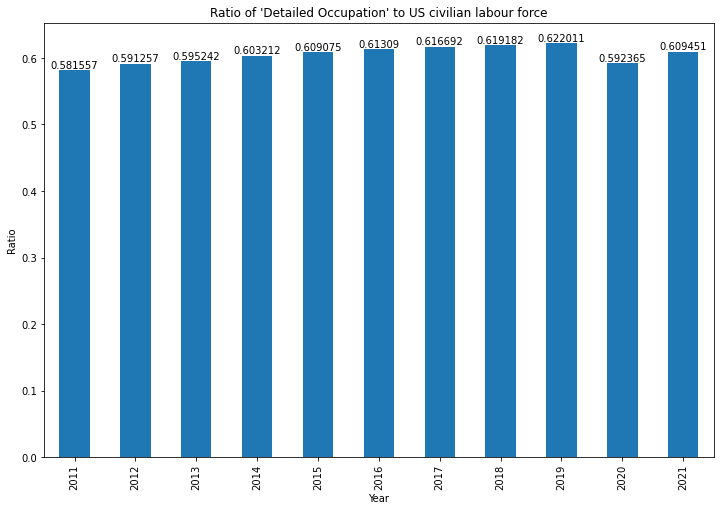

In [40]:
# Ratio of 'Detailed Occupation' to US civilian labour force

plt.figure(figsize=(12, 8))
fig = pd.Series((detailed_sum_arr/total_arr).reshape(11,)).plot(kind='bar')
fig.set_xticklabels(year)
fig.bar_label(fig.containers[0], label_type='edge')
fig.set_title('Ratio of \'Detailed Occupation\' to US civilian labour force')
fig.set_xlabel('Year')
fig.set_ylabel('Ratio')

Text(0, 0.5, 'Ratio')

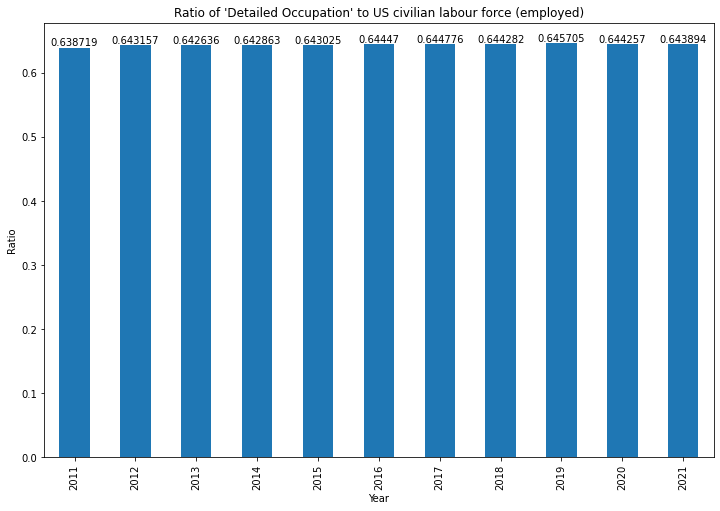

In [41]:
# Ratio of 'Detailed Occupation' to US civilian labour force (employed)

plt.figure(figsize=(12, 8))
fig = pd.Series((detailed_sum_arr/total_employed_arr).reshape(11,)).plot(kind='bar')
fig.set_xticklabels(year)
fig.bar_label(fig.containers[0], label_type='edge')
fig.set_title('Ratio of \'Detailed Occupation\' to US civilian labour force (employed)')
fig.set_xlabel('Year')
fig.set_ylabel('Ratio')

In [42]:
# Major Group

major=joint_processed[(joint_processed['Minor Group']=='-')&(joint_processed['Broad Group']=='-')&(joint_processed['Detailed Occupation']=='-')]
major_sum=major.groupby(['Year']).sum()
major_sum_arr=major_sum['Total'].to_numpy()

major_sum_arr=major_sum_arr.reshape(-1,1)

# plt.bar(year,(major_sum_arr/total_arr).reshape(11,))     # Proportion of Major Group occupations wrt total employed
# print((major_sum_arr/total_arr))

Text(0, 0.5, 'Ratio')

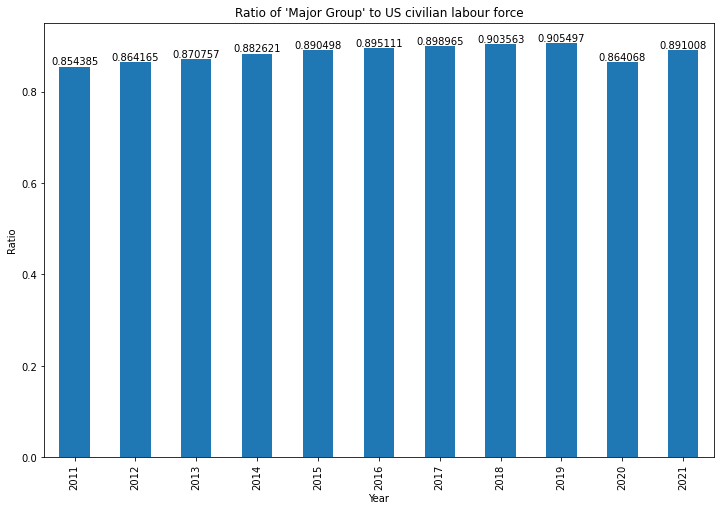

In [43]:
# Ratio of 'Major Group' to US civilian labour force

plt.figure(figsize=(12, 8))
fig = pd.Series((major_sum_arr/total_arr).reshape(11,)).plot(kind='bar')
fig.set_xticklabels(year)
fig.bar_label(fig.containers[0], label_type='edge')
fig.set_title('Ratio of \'Major Group\' to US civilian labour force')
fig.set_xlabel('Year')
fig.set_ylabel('Ratio')

Text(0, 0.5, 'Ratio')

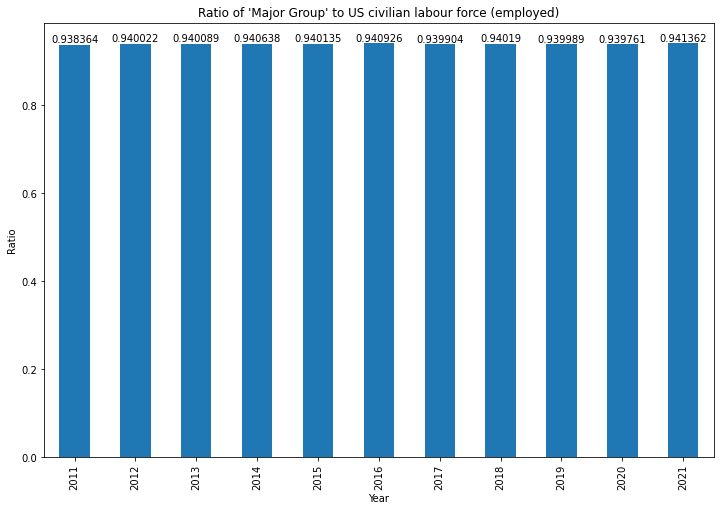

In [44]:
# Ratio of 'Major Group' to US civilian labour force (employed)

plt.figure(figsize=(12, 8))
fig = pd.Series((major_sum_arr/total_employed_arr).reshape(11,)).plot(kind='bar')
fig.set_xticklabels(year)
fig.bar_label(fig.containers[0], label_type='edge')
fig.set_title('Ratio of \'Major Group\' to US civilian labour force (employed)')
fig.set_xlabel('Year')
fig.set_ylabel('Ratio')

Text(0, 0.5, 'Ratio')

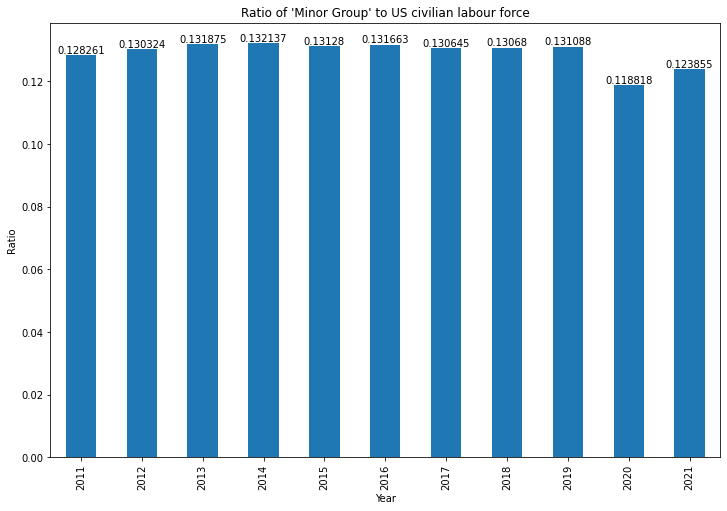

In [45]:
# Ratio of 'Minor Group' to US civilian labour force

minor=joint_processed[(joint_processed['Minor Group']!='-')&(joint_processed['Broad Group']=='-')&(joint_processed['Detailed Occupation']=='-')]
minor_sum=minor.groupby(['Year']).sum()
minor_sum_arr=minor_sum['Total'].to_numpy()

minor_sum_arr=minor_sum_arr.reshape(-1,1)

plt.figure(figsize=(12, 8))
fig = pd.Series((minor_sum_arr/total_arr).reshape(11,)).plot(kind='bar')
fig.set_xticklabels(year)
fig.bar_label(fig.containers[0], label_type='edge')
fig.set_title('Ratio of \'Minor Group\' to US civilian labour force')
fig.set_xlabel('Year')
fig.set_ylabel('Ratio')

Text(0, 0.5, 'Ratio')

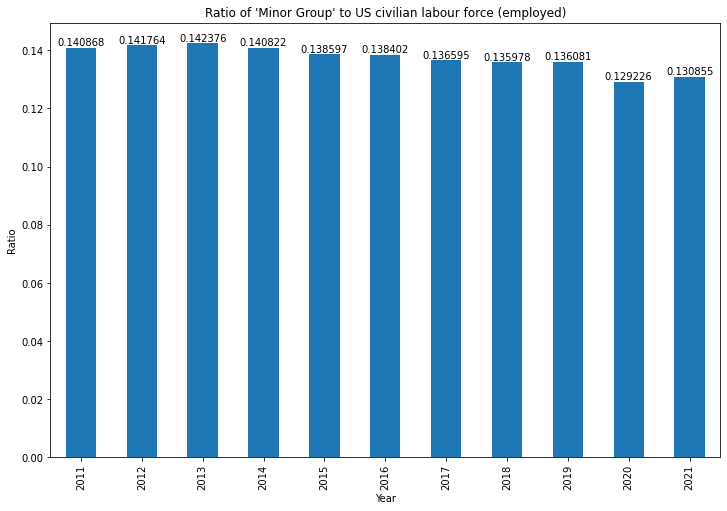

In [46]:
# Ratio of 'Minor Group' to US civilian labour force (employed)

plt.figure(figsize=(12, 8))
fig = pd.Series((minor_sum_arr/total_employed_arr).reshape(11,)).plot(kind='bar')
fig.set_xticklabels(year)
fig.bar_label(fig.containers[0], label_type='edge')
fig.set_title('Ratio of \'Minor Group\' to US civilian labour force (employed)')
fig.set_xlabel('Year')
fig.set_ylabel('Ratio')

Text(0, 0.5, 'Ratio')

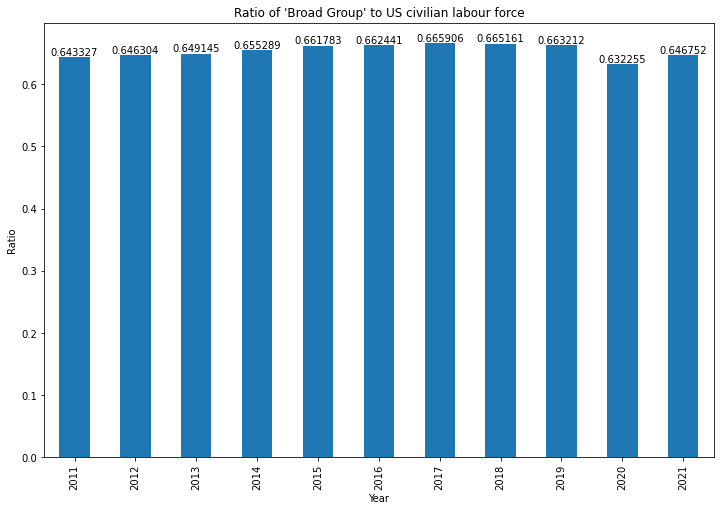

In [47]:
# Ratio of 'Broad Group' to US civilian labour force

broad=joint_processed[(joint_processed['Minor Group']!='-')&(joint_processed['Broad Group']!='-')&(joint_processed['Detailed Occupation']=='-')]
broad_sum=broad.groupby(['Year']).sum()
broad_sum_arr=broad_sum['Total'].to_numpy()

broad_sum_arr=broad_sum_arr.reshape(-1,1)

plt.figure(figsize=(12, 8))
fig = pd.Series((broad_sum_arr/total_arr).reshape(11,)).plot(kind='bar')
fig.set_xticklabels(year)
fig.bar_label(fig.containers[0], label_type='edge')
fig.set_title('Ratio of \'Broad Group\' to US civilian labour force')
fig.set_xlabel('Year')
fig.set_ylabel('Ratio')

Text(0, 0.5, 'Ratio')

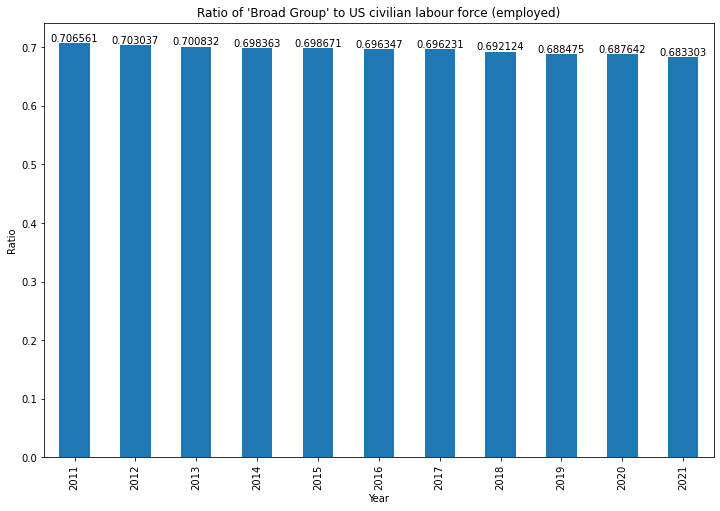

In [48]:
# Ratio of 'Broad Group' to US civilian labour force (employed)

plt.figure(figsize=(12, 8))
fig = pd.Series((broad_sum_arr/total_employed_arr).reshape(11,)).plot(kind='bar')
fig.set_xticklabels(year)
fig.bar_label(fig.containers[0], label_type='edge')
fig.set_title('Ratio of \'Broad Group\' to US civilian labour force (employed)')
fig.set_xlabel('Year')
fig.set_ylabel('Ratio')

In [49]:
joint_processed.iloc[:,1]

0       18986.0
1       18564.0
2       18985.0
3       18263.0
4       17804.0
         ...   
8137      108.0
8138      106.0
8139      106.0
8140       92.0
8141       92.0
Name: Total, Length: 8142, dtype: float64

In [50]:
# Old to young ratio

young=joint_processed.iloc[:,2:7].sum(axis=1)
old=joint_processed['65<=']

ratio=old/young
ratio=pd.concat([joint_processed[['Occupation','Year','Major Group','Minor Group','Broad Group','Detailed Occupation']],ratio],axis=1)
ratio=ratio.rename(columns={0:'Ratio'})
ratio_major = ratio[(ratio['Minor Group']=='-')&(joint_processed['Broad Group']=='-')&(joint_processed['Detailed Occupation']=='-')]

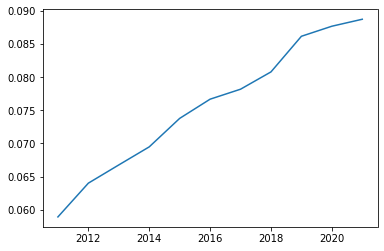

In [51]:
# Old to young ratio

ratio_major_mean=ratio_major.loc[ratio['Ratio']!=np.inf,['Year','Ratio']].groupby('Year').agg('mean')     # Note than certain ratios are inf because those occupations have zero young people; need to filter them out first
plt.plot(ratio_major_mean)      # Change in ratio over Major Groups over the years

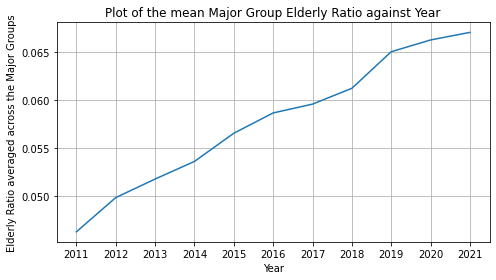

In [52]:
# Old to total ratio

total_prop = joint_processed.iloc[:,1]
prop = old/total_prop
prop=pd.concat([joint_processed[['Occupation','Year','Major Group','Minor Group','Broad Group','Detailed Occupation']],prop],axis=1)
prop=prop.rename(columns={0:'Elderly proportion'})
prop_major = prop[(prop['Minor Group']=='-')&(joint_processed['Broad Group']=='-')&(joint_processed['Detailed Occupation']=='-')]

prop_major_mean=prop_major[['Year','Elderly proportion']].groupby('Year').agg('mean')     # Note than certain ratios are inf because those occupations have zero young people; need to filter them out first
plt.rcParams["figure.figsize"] = [7.00, 4]
plt.rcParams["figure.autolayout"] = True
plt.plot(range(len(prop_major_mean)),prop_major_mean)      # Change in ratio over Major Groups over the years
plt.xticks(range(len(prop_major_mean)), prop_major_mean.index)
plt.title('Plot of the mean Major Group Elderly Ratio against Year')
plt.xlabel('Year')
plt.ylabel('Elderly Ratio averaged across the Major Groups')
plt.grid()
plt.show()



In [53]:
total_prop = joint_processed.iloc[:,1]
prop = old/total_prop
prop

0       0.085853
1       0.089043
2       0.087174
3       0.077753
4       0.076893
          ...   
8137    0.055556
8138    0.037736
8139    0.037736
8140    0.043478
8141    0.043478
Length: 8142, dtype: float64

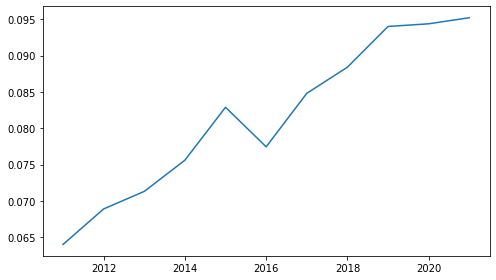

In [54]:
ratio_detailed=ratio[ratio['Detailed Occupation']!='-']
ratio_detailed_mean=ratio_detailed.loc[ratio['Ratio']!=np.inf,['Year','Ratio']].groupby('Year').agg('mean')     # Note than certain ratios are inf because those occupations have zero young people; need to filter them out first
plt.plot(ratio_detailed_mean)      # Change in ratio over Detailed Occupations over the years


In [776]:
# ratio[ratio['Ratio']==np.inf]

Text(0.5, 1.0, 'Percentage change of ratio from 2011 to 2021 among Major Groups')

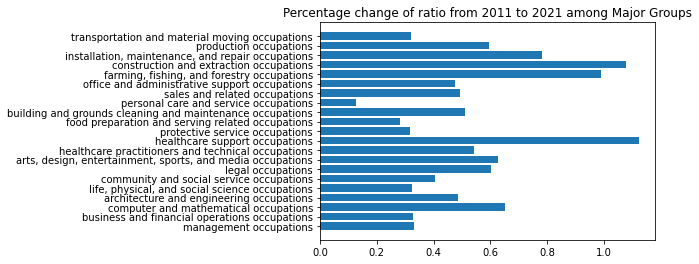

In [806]:
# Elderly to young ratio

ratio_two_years=ratio_major[(ratio_major['Year']==2021)|(ratio_major['Year']==2011)]
ratio_2011=ratio_two_years.loc[ratio_two_years['Year']==2011,'Ratio'].to_numpy()
ratio_2021=ratio_two_years.loc[ratio_two_years['Year']==2021,'Ratio'].to_numpy()

plt.barh(ratio_two_years.drop_duplicates('Occupation')['Occupation'],(ratio_2021-ratio_2011)/ratio_2011)
plt.title('Percentage change of ratio from 2011 to 2021 among Major Groups')        # Percentage change of ratio from 2011 to 2021 among Major Groups

Text(0.5, 1.0, 'Percentage change of ratio from 2011 to 2021 among Major Groups')

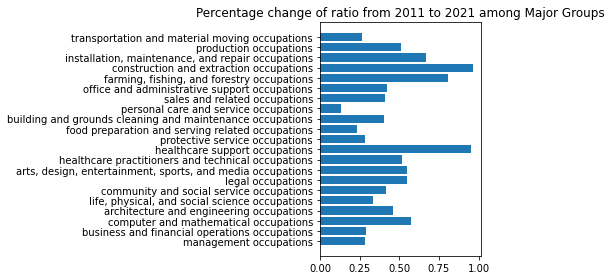

In [55]:
# Elderly to total ratio

prop_two_years=prop_major[(prop_major['Year']==2021)|(prop_major['Year']==2011)]
prop_2011=prop_two_years.loc[prop_two_years['Year']==2011,'Elderly proportion'].to_numpy()
prop_2021=prop_two_years.loc[prop_two_years['Year']==2021,'Elderly proportion'].to_numpy()
percentage_change = pd.DataFrame(np.concatenate([prop_two_years.drop_duplicates('Occupation')['Occupation'].to_numpy().reshape(21,1),((prop_2021-prop_2011)/prop_2011).reshape(21,1)],axis=1))
percentage_change = percentage_change.sort_values([1],ascending=True)

plt.barh(prop_two_years.drop_duplicates('Occupation')['Occupation'],(prop_2021-prop_2011)/prop_2011)
plt.title('Percentage change of ratio from 2011 to 2021 among Major Groups')        # Percentage change of ratio from 2011 to 2021 among Major Groups

Text(0.5, 1.0, 'Percentage change from 2011 to 2021')

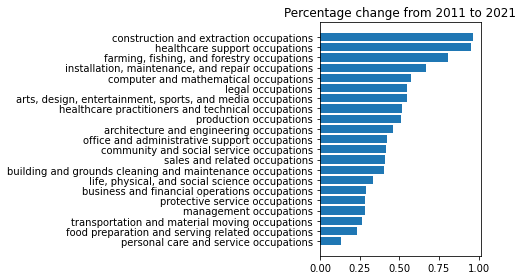

In [56]:
plt.barh(percentage_change[0],percentage_change[1])
plt.title('Percentage change from 2011 to 2021')

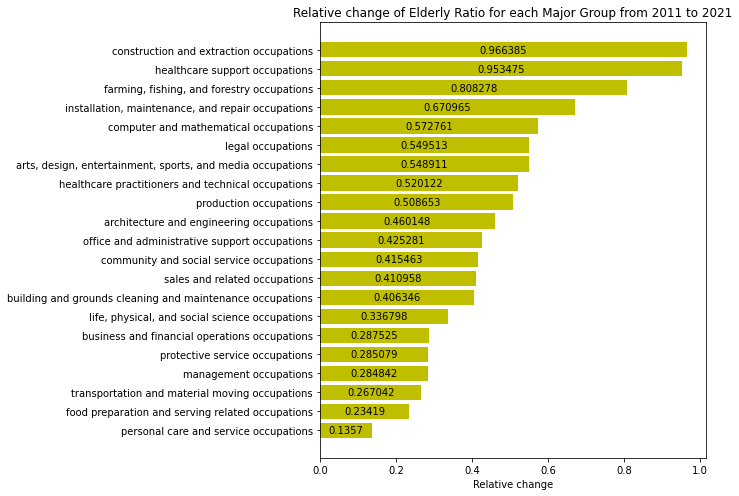

In [77]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
bars = ax.barh(percentage_change[0],percentage_change[1],color='y')
plt.title('Relative change of Elderly Ratio for each Major Group from 2011 to 2021')
plt.xlabel('Relative change')
ax.bar_label(bars,label_type='center')
plt.show()

Automatability Data

In [269]:
# Import automatability data for the US

auto_data=pd.read_excel('/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/US_data_email.xls')


In [270]:
auto_data['Occupation Name']=auto_data['Occupation Name'].str.lower()
test=auto_data[['Occupation Name','BLS codes']]

In [400]:
test2=changes2010.copy()

In [401]:
joint_test2 = pd.merge(left = auto_data, 
         right = test2[test2['Action']=='change'],
        how= 'left',
        left_on='Occupation Name',
        right_on='Occupation')

joint_test2.loc[joint_test2['Action'].notnull(),'Occupation Name']=joint_test2.loc[joint_test2['Action'].notnull(),'Map to']     # Rename
joint_test2.drop(joint_test2.columns[[-1,-2,-3]],axis=1,inplace=True)      # Drop unnecessary columns

auto_processed=joint_test2
auto_processed.rename(columns={'Occupation Name':'Occupation'},inplace=True)

In [402]:
auto_processed

,Occupation,BLS codes,Category Label,Probability of Computerisation,Assisting and caring for others,Persuasion,Negotiation,Social perceptiveness,Fine arts,Originality,...,Cramped work space,Employment in Thousands,Income (Thousands USD),High school diploma or equivalent,Some college,no degree,Associate's degree,Bachelor's degree,Master's degree,Training set automatable labels
0,recreational therapists,29-1125_,4,0.002751,77.0,52.0,48.0,57.0,35.0,54.0,...,27.0,0.0224,39.41,98.1,88.3,75.4,68.7,13.8,1.1,NaN
1,first-line supervisors of mechanics installers...,49-1011_,10,0.002978,58.0,50.0,54.0,54.0,0.0,54.0,...,27.0,0.4312,59.15,92.0,54.0,23.7,12.1,2.2,0.2,NaN
2,emergency management directors,11-9161_,1,0.003012,65.0,55.0,50.0,57.0,0.0,57.0,...,28.0,0.0121,55.36,97.9,82.3,59.2,48.5,15.3,2.6,NaN
3,mental health and substance abuse social workers,21-1023_,3,0.003094,80.0,55.0,52.0,79.0,8.0,52.0,...,23.0,0.1261,38.60,98.8,92.7,82.5,76.6,34.4,1.8,NaN
4,audiologists,29-1181_,4,0.003259,73.0,45.0,37.0,57.0,8.0,54.0,...,12.0,0.0130,66.66,99.9,97.8,95.1,94.2,89.5,34.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,insurance underwriters,13-2053_,1,0.989080,17.0,37.0,39.0,45.0,0.0,37.0,...,0.0,0.1018,59.29,99.5,81.2,58.1,50.0,7.5,1.5,1.0
698,mathematical technicians,15-2091_,2,0.989080,17.0,24.0,12.0,5.0,0.0,37.0,...,0.0,0.0011,44.88,100.0,99.2,94.5,88.8,54.5,24.4,NaN
699,sewers hand,51-6051_,11,0.989570,21.0,27.0,29.0,29.0,35.0,34.0,...,9.0,0.0104,23.14,73.3,37.8,20.9,14.1,2.9,0.6,NaN
700,title examiners abstractors and searchers,23-2093_,3,0.990200,17.0,39.0,37.0,39.0,0.0,32.0,...,2.0,0.0590,38.99,98.2,79.3,52.0,38.6,10.9,4.1,NaN


In [403]:
joint_auto=pd.merge(right=auto_processed, left=joint_processed[joint_processed['Detailed Occupation']!='-'],how='inner',left_on='Occupation',right_on='Occupation')  #Combined rows

In [404]:
joint_auto.drop(columns={'BLS codes'},inplace=True)

In [405]:
auto_arr=joint_auto[['Year','Total']].groupby(['Year']).agg(sum).to_numpy()

Text(0, 0.5, 'Ratio')

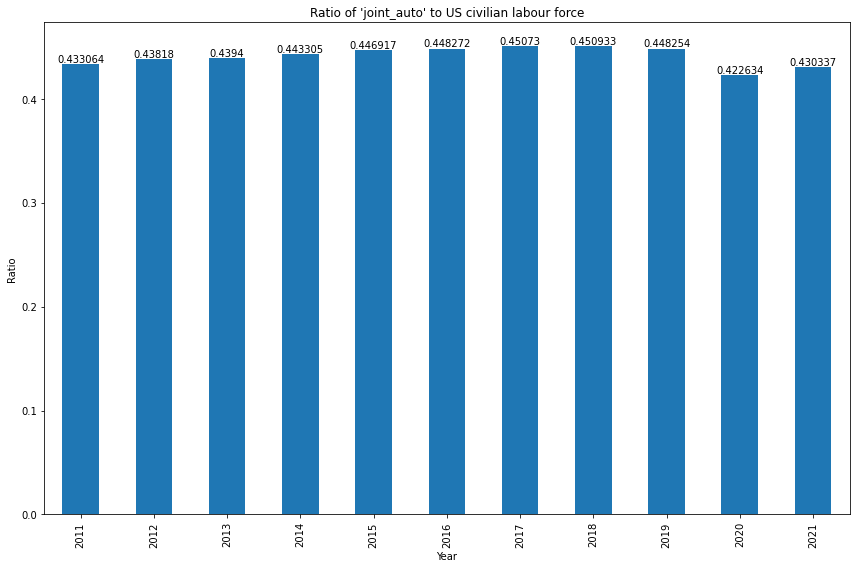

In [406]:
plt.figure(figsize=(12, 8))
fig = pd.Series((auto_arr/total_arr).reshape(11,)).plot(kind='bar')
fig.set_xticklabels(year)
fig.bar_label(fig.containers[0], label_type='edge')
fig.set_title('Ratio of \'joint_auto\' to US civilian labour force')
fig.set_xlabel('Year')
fig.set_ylabel('Ratio')

In [335]:
joint_auto.drop(joint_auto.iloc[:,-18:-1],axis=1,inplace=True)

In [410]:
joint_auto['Elderly Ratio'] = joint_auto['65<=']/joint_auto['Total']
joint_auto.fillna(0,inplace=True)

In [411]:
joint_auto2=joint_auto[['Occupation','Probability of Computerisation','Elderly Ratio','Category Label']].groupby(['Occupation']).agg('mean')

In [412]:
joint_auto2

,Probability of Computerisation,Elderly Ratio,Category Label
Occupation,,,
accountants and auditors,0.935060,0.066089,1
actors,0.374450,0.089351,3
actuaries,0.205900,0.029248,2
adhesive bonding machine operators and tenders,0.952760,0.033058,11
advertising and promotions managers,0.038603,0.033726,1
...,...,...,...
veterinary assistants and laboratory animal caretakers,0.862970,0.010085,5
waiters and waitresses,0.937140,0.016448,5
water and wastewater treatment plant and system operators,0.613790,0.035271,11


In [414]:
joint_auto2['Probability of Computerisation'].corr(joint_auto2['Elderly Ratio'],method='pearson')

-0.02495456883002524

In [419]:
joint_auto2011 = joint_auto[joint_auto['Year']==2011][['Occupation','Elderly Ratio']]
joint_auto2021 = joint_auto[joint_auto['Year']==2021][['Occupation','Elderly Ratio']]

joint_auto2011_arr = joint_auto2011['Elderly Ratio'].to_numpy()
joint_auto2021_arr = joint_auto2021['Elderly Ratio'].to_numpy()

In [432]:
pd.Series((joint_auto2021_arr-joint_auto2011_arr)/joint_auto2021_arr)

<ipython-input-432-879648851b4e>:1: RuntimeWarning: divide by zero encountered in true_divide
  pd.Series((joint_auto2021_arr-joint_auto2011_arr)/joint_auto2021_arr).isnull().sum()
<ipython-input-432-879648851b4e>:1: RuntimeWarning: invalid value encountered in true_divide
  pd.Series((joint_auto2021_arr-joint_auto2011_arr)/joint_auto2021_arr).isnull().sum()


24

In [418]:
joint_auto2021[joint_auto2021['Elderly Ratio'].notnull()]

,Occupation,Elderly Ratio
0,chief executives,0.122596
11,general and operations managers,0.043318
22,advertising and promotions managers,0.027778
33,computer and information systems managers,0.029371
44,financial managers,0.053558
...,...,...
2585,industrial truck and tractor operators,0.035313
2596,cleaners of vehicles and equipment,0.049834
2607,machine feeders and offbearers,0.090909
2618,stockers and order fillers,0.046610


In [478]:
joint_auto.iloc[:,0:20]

,Occupation,Total,16-19,20-24,25-34,35-44,45-54,55-64,65<=,Median age,Year,Major Group,Minor Group,Broad Group,Detailed Occupation,Category Label,Probability of Computerisation,Assisting and caring for others,Persuasion,Negotiation
0,chief executives,1664.0,1.0,4.0,157.0,388.0,446.0,464.0,204.0,51.6,2021,11-0000,11-1000,11-1010,11-1011,1,0.015226,35.0,71.0,64.0
1,chief executives,1669.0,0.0,7.0,138.0,368.0,465.0,463.0,227.0,52,2020,11-0000,11-1000,11-1010,11-1011,1,0.015226,35.0,71.0,64.0
2,chief executives,1602.0,2.0,5.0,121.0,329.0,461.0,465.0,219.0,52.7,2019,11-0000,11-1000,11-1010,11-1011,1,0.015226,35.0,71.0,64.0
3,chief executives,1573.0,0.0,3.0,147.0,349.0,467.0,413.0,193.0,51.5,2018,11-0000,11-1000,11-1010,11-1011,1,0.015226,35.0,71.0,64.0
4,chief executives,1639.0,2.0,4.0,145.0,328.0,505.0,455.0,201.0,52.2,2017,11-0000,11-1000,11-1010,11-1011,1,0.015226,35.0,71.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,refuse and recyclable material collectors,97.0,3.0,13.0,18.0,18.0,24.0,18.0,4.0,42.7,2015,53-0000,53-7000,53-7080,53-7081,12,0.933840,35.0,30.0,30.0
2636,refuse and recyclable material collectors,84.0,2.0,8.0,20.0,17.0,21.0,10.0,5.0,41.7,2014,53-0000,53-7000,53-7080,53-7081,12,0.933840,35.0,30.0,30.0
2637,refuse and recyclable material collectors,108.0,2.0,10.0,32.0,20.0,24.0,15.0,6.0,41.1,2013,53-0000,53-7000,53-7080,53-7081,12,0.933840,35.0,30.0,30.0
2638,refuse and recyclable material collectors,106.0,3.0,9.0,23.0,27.0,30.0,11.0,4.0,41.9,2012,53-0000,53-7000,53-7080,53-7081,12,0.933840,35.0,30.0,30.0


Apply Gaussian Process

In [433]:
# Import sklearn

import sklearn as sk
import sklearn.gaussian_process as gp

In [468]:
kernel1=gp.kernels.RBF()

In [469]:
joint_auto_train = joint_auto2.iloc[0:200]
joint_auto_test = joint_auto2.iloc[200:240]

In [470]:
gpr=gp.GaussianProcessRegressor(normalize_y=False,kernel=kernel1,n_restarts_optimizer=20)
gpr.fit(joint_auto_train[['Probability of Computerisation','Category Label']],joint_auto_train['Elderly Ratio'])

GaussianProcessRegressor(kernel=RBF(length_scale=1), n_restarts_optimizer=20)

In [471]:
gpr.predict(joint_auto_test[['Probability of Computerisation','Category Label']])

array([ 1.34695533e-003,  0.00000000e+000,  0.00000000e+000,
        3.46707019e-007,  5.27516017e-005,  4.86073738e-058,
        0.00000000e+000,  4.46279177e-002,  2.82131246e-319,
        1.49256587e-078,  5.00349736e-023, -9.96876680e-001,
        5.44639482e-005,  8.04185621e-029,  8.44178747e-009,
        3.11707439e-117,  1.40375506e-022,  0.00000000e+000,
        9.72681702e-009,  0.00000000e+000,  7.17843972e-003,
        0.00000000e+000,  0.00000000e+000,  2.17417290e-024,
        7.60210355e-002,  5.23629432e-001,  2.41871265e-010,
        1.49273261e-006,  3.44122623e-002,  1.10519273e-001,
        1.92263278e-002,  4.23675081e-095,  0.00000000e+000,
        2.69768724e-116,  9.38810925e-019,  3.19261262e-014,
        2.09161633e-010,  2.62250806e-002,  8.47933210e-237,
        6.21626529e-004])

In [472]:
gpr.score(joint_auto_test[['Probability of Computerisation','Category Label']],joint_auto_test['Elderly Ratio'])

-20.090110856290742